In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="white")

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Reading Data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# Visualizing train dataset first five rows.
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Train Data

### Exploring and Analysing Train Data

In [4]:
# Columns in train dataset.
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
#Train dataset shape (Rows, Columns).
train_data.shape

(891, 12)

In [6]:
# Details about train dataset data types.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Train dataset statistical summary.
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Viusally Analysing Train Data

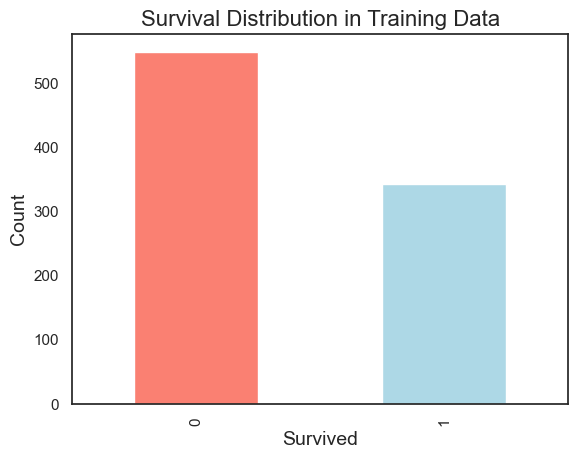

In [8]:
# Visualizing the distribution of the "Survived" feature in the training dataset.
# Bar chart showing the count of survivors (1) and non-survivors (0).
# Analyzing the balance between the two classes.
train_data["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

plt.title('Survival Distribution in Training Data', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [9]:
# Cross-tabulation table to analyze the relationship between survival and gender.
pd.crosstab(train_data.Survived, train_data.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


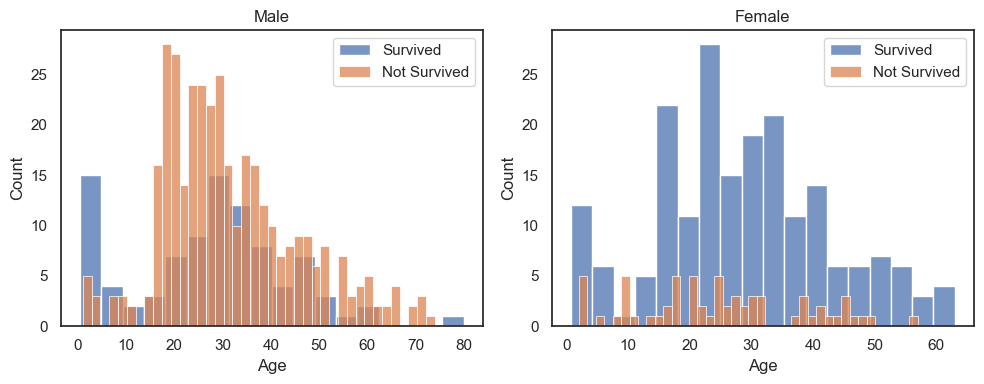

In [10]:
# Visualizing the distribution of passenger ages based on gender and survival status in the training dataset.
survived_label = 'Survived'
not_survived_label = 'Not Survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

male = train_data[train_data['Sex'] == 'male']
female = train_data[train_data['Sex'] == 'female']

ax = sns.histplot(male[male['Survived'] == 1].Age.dropna(), bins=18, label=survived_label, 
                  ax=axes[0], kde=False)
ax = sns.histplot(male[male['Survived'] == 0].Age.dropna(), bins=40, label=not_survived_label, 
                  ax=axes[0], kde=False)
ax.legend()
ax.set_title('Male')

ax = sns.histplot(female[female['Survived'] == 1].Age.dropna(), bins=18, label=survived_label, 
                  ax=axes[1], kde=False)
ax = sns.histplot(female[female['Survived'] == 0].Age.dropna(), bins=40, label=not_survived_label, 
                  ax=axes[1], kde=False)
ax.legend()
ax.set_title('Female')

for ax in axes:
    ax.set_xlabel('Age')

plt.tight_layout()
plt.show()

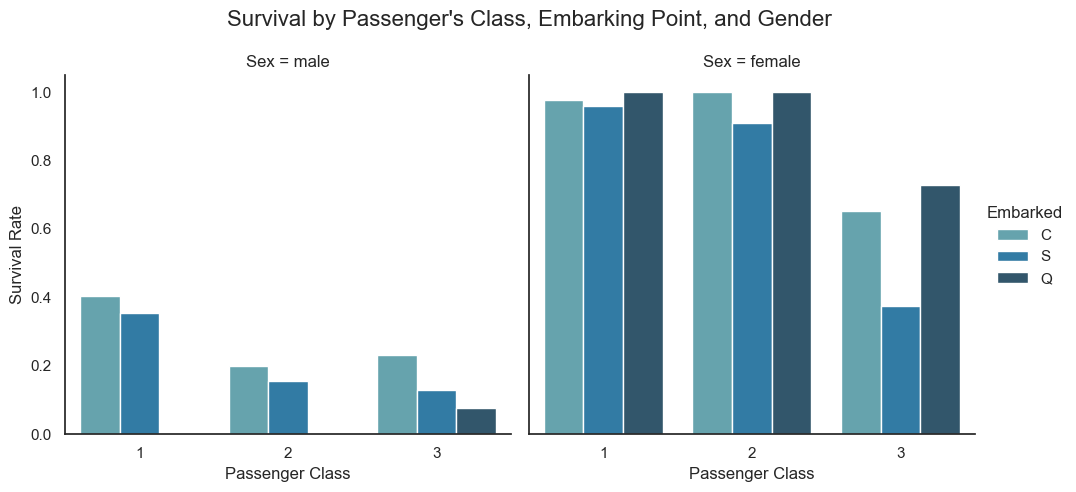

In [11]:
# Visualizing the survival rate of passengers based on their passenger class, embarking point, and gender in the training dataset.
g = sns.catplot(x='Pclass', y='Survived', hue='Embarked', col='Sex', kind='bar', data=train_data, palette='YlGnBu_d', errorbar=None)

g.fig.suptitle('Survival by Passenger\'s Class, Embarking Point, and Gender', fontsize=16)
g.set_axis_labels('Passenger Class', 'Survival Rate')

g.fig.subplots_adjust(top=0.85)

plt.show()

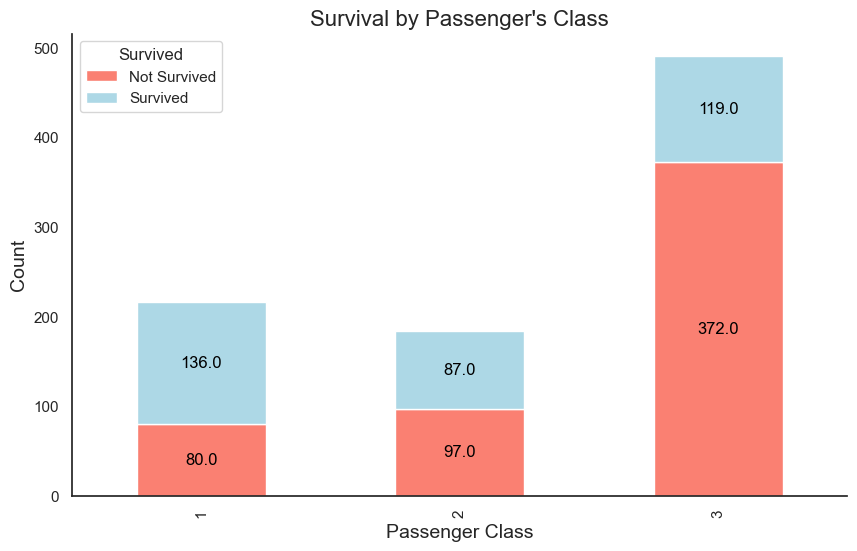

In [12]:
# Visualizing the distribution of passenger survival within each passenger class in the training dataset.
counts = train_data.groupby(['Pclass', 'Survived']).size().unstack()

ax = counts.plot(kind='bar', stacked=True, color=["salmon", "lightblue"], figsize=(10, 6))

plt.title('Survival by Passenger\'s Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=12, color='black')

plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

sns.despine()

plt.show()

### Pre-processing Train Data

In [13]:
train_df = train_data.copy()

In [14]:
# Checking missing values.
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Statistical summary of "Embarked" column in train dataset to check the most frequently occuring embarkation point.
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
# Filling missing value in the 'Embarked' column with the most frequent embarkation point.
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [17]:
# Dropping "Cabin" column as it has alot of missing values. Makes no sense to impute the missing values.
train_df = train_df.drop('Cabin', axis=1)

# Dropping "PassengerID" column as it makes no sense to provide any input in training process.
train_df = train_df.drop('PassengerId', axis=1)

In [18]:
# Imputing the missing values in the 'Age' column of the train dataset by utilizing RandomForestRegressor, 
# to predict missing ages based on other features.
features = ['Pclass', 'SibSp', 'Parch', 'Fare']

known_age = train_df[train_df['Age'].notna()]
unknown_age = train_df[train_df['Age'].isna()]

model = RandomForestRegressor()
model.fit(known_age[features], known_age['Age'])

predicted_ages = model.predict(unknown_age[features])

train_df.loc[train_df['Age'].isna(), 'Age'] = predicted_ages

In [19]:
# Converting "Age" and "Fare" columns from data type float to integer.
train_df['Age'] = train_df['Age'].astype(int)
train_df['Fare'] = train_df['Fare'].astype(int)

In [20]:
# Rechecking missing values in train dataset.
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [21]:
# Mapping categorical values to numerical values in the 'Embarked' and 'Sex' columns of the train dataset.
embarked_mapping = {'C': 0, 'S': 1, 'Q': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)

sex_mapping = {'male': 0, 'female': 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)

In [22]:
# Dropping "Name" and "Ticket" column from train dataset.
train_df = train_df.drop('Name', axis=1)
train_df = train_df.drop('Ticket', axis=1)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int32
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int32
 7   Embarked  891 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 48.9 KB


In [24]:
# Createing new features in the train dataset to enhance the dataset for machine learning.
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, np.inf], 
                               labels=[0, 1, 2, 3, 4], right=False)

train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1

train_df['Fare_Category'] = pd.qcut(train_df['Fare'], q=4, labels=False)

train_df['Age_Pclass'] = train_df['Age'] * train_df['Pclass']

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Sex            891 non-null    int64   
 3   Age            891 non-null    int32   
 4   SibSp          891 non-null    int64   
 5   Parch          891 non-null    int64   
 6   Fare           891 non-null    int32   
 7   Embarked       891 non-null    int64   
 8   Age_Group      891 non-null    category
 9   Family_Size    891 non-null    int64   
 10  Fare_Category  891 non-null    int64   
 11  Age_Pclass     891 non-null    int64   
dtypes: category(1), int32(2), int64(9)
memory usage: 70.8 KB


In [26]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group,Family_Size,Fare_Category,Age_Pclass
0,0,3,0,22,1,0,7,1,2,2,0,66
1,1,1,1,38,1,0,71,0,3,2,3,38
2,1,3,1,26,0,0,7,1,2,1,0,78
3,1,1,1,35,1,0,53,1,3,2,3,35
4,0,3,0,35,0,0,8,1,3,1,1,105


## Test Data

### Exploring and Analysing Test Data¶


In [27]:
test_df = test_data.copy()

In [28]:
# Visualizing test dataset first five rows.
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
# SHape of test dataset
test_df.shape

(418, 11)

In [30]:
# Summary of test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
# Checking missing values in test dataset.
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Pre-processing Test Data

In [32]:
# Filling missing values in the 'Fare' column of the test dataset.
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [33]:
# Dropping "PassengerID" column.
test_df = test_df.drop('PassengerId', axis=1)

# Dropping "Cabin" column as it has alot of missing values. Makes no sense to impute the missing values.
test_df = test_df.drop('Cabin', axis=1)

In [34]:
# Imputing the missing values in the 'Age' column of the test dataset by utilizing RandomForestRegressor, 
# to predict missing ages based on other features.
features = ['Pclass', 'SibSp', 'Parch', 'Fare']

known_age_test = test_df[test_df['Age'].notna()]
unknown_age_test = test_df[test_df['Age'].isna()]

model = RandomForestRegressor()
model.fit(known_age_test[features], known_age_test['Age'])

predicted_ages = model.predict(unknown_age_test[features])

test_df.loc[test_df['Age'].isna(), 'Age'] = predicted_ages

In [35]:
# Converting "Age" and "Fare" columns from data type float to integer.
test_df['Age'] = test_df['Age'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)

In [36]:
# Mapping categorical values to numerical values in the 'Embarked' and 'Sex' columns of the test dataset.
embarked_mapping = {'C': 0, 'S': 1, 'Q': 2}
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

sex_mapping = {'male': 0, 'female': 1}
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

In [37]:
# Dropping "Name" and "Ticket" column from test dataset.
test_df = test_df.drop('Name', axis=1)
test_df = test_df.drop('Ticket', axis=1)

In [38]:
# Createing new features in the test dataset to enhance the dataset for machine learning.
test_df['Age_Group'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 35, 60, np.inf], 
                               labels=[0, 1, 2, 3, 4], right=False)

test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

test_df['Fare_Category'] = pd.qcut(test_df['Fare'], q=4, labels=False)

test_df['Age_Pclass'] = test_df['Age'] * test_df['Pclass']

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         418 non-null    int64   
 1   Sex            418 non-null    int64   
 2   Age            418 non-null    int32   
 3   SibSp          418 non-null    int64   
 4   Parch          418 non-null    int64   
 5   Fare           418 non-null    int32   
 6   Embarked       418 non-null    int64   
 7   Age_Group      418 non-null    category
 8   Family_Size    418 non-null    int64   
 9   Fare_Category  418 non-null    int64   
 10  Age_Pclass     418 non-null    int64   
dtypes: category(1), int32(2), int64(8)
memory usage: 30.1 KB


In [40]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group,Family_Size,Fare_Category,Age_Pclass
0,3,0,34,0,0,7,2,2,1,0,102
1,3,1,47,1,0,7,1,3,2,0,141
2,2,0,62,0,0,9,2,4,1,1,124
3,3,0,27,0,0,8,1,2,1,1,81
4,3,1,22,1,1,12,1,2,3,1,66


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Sex            891 non-null    int64   
 3   Age            891 non-null    int32   
 4   SibSp          891 non-null    int64   
 5   Parch          891 non-null    int64   
 6   Fare           891 non-null    int32   
 7   Embarked       891 non-null    int64   
 8   Age_Group      891 non-null    category
 9   Family_Size    891 non-null    int64   
 10  Fare_Category  891 non-null    int64   
 11  Age_Pclass     891 non-null    int64   
dtypes: category(1), int32(2), int64(9)
memory usage: 70.8 KB


In [42]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group,Family_Size,Fare_Category,Age_Pclass
0,0,3,0,22,1,0,7,1,2,2,0,66
1,1,1,1,38,1,0,71,0,3,2,3,38
2,1,3,1,26,0,0,7,1,2,1,0,78
3,1,1,1,35,1,0,53,1,3,2,3,35
4,0,3,0,35,0,0,8,1,3,1,1,105


In [43]:
len(train_df.columns), len(test_df.columns)

(12, 11)

## Model Building

In [44]:
# Preparing the train and test datasets for machine learning modeling.

# It creates the following dataframes:
# - 'X_train': Contains the training data with the 'Survived' column dropped, serving as the feature matrix.
# - 'Y_train': Contains the 'Survived' column, which is the target variable for training.
# - 'X_test': A copy of the 'test_df' dataframe, which is used for making predictions on the test data.

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.copy()

In [45]:
# Shapes (dimensions) of the 'X_train' feature matrix and 'Y_train' target variable.
X_train.shape, Y_train.shape

((891, 11), (891,))

### Training and evaluating

In [46]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, Y_train)

rf_train_preds = rf_model.predict(X_train)

rf_accuracy = rf_model.score(X_train, Y_train)
print("RandomForest Accuracy (Training):", rf_accuracy)

RandomForest Accuracy (Training): 0.9640852974186308


In [47]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, Y_train)

knn_train_preds = knn_model.predict(X_train)

knn_accuracy = knn_model.score(X_train, Y_train)
print("KNN Accuracy (Training):", knn_accuracy)

KNN Accuracy (Training): 0.8047138047138047


In [48]:
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, Y_train)

dt_train_preds = dt_model.predict(X_train)

dt_accuracy = dt_model.score(X_train, Y_train)
print("Decision Tree Accuracy (Training):", dt_accuracy)

Decision Tree Accuracy (Training): 0.9640852974186308


In [49]:
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train, Y_train)

lr_train_preds = lr_model.predict(X_train)

lr_accuracy = lr_model.score(X_train, Y_train)
print("Logistic Regression Accuracy (Training):", lr_accuracy)

Logistic Regression Accuracy (Training): 0.8013468013468014


### Best Model

In [50]:
models = {
    "RandomForest": RandomForestClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

model_scores = {name: cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean() 
                for name, model in models.items()}

for name, score in model_scores.items():
    print(f"{name}: {score}")

RandomForest: 0.8215617349821104
KNeighbors: 0.6847090578118135
DecisionTree: 0.7867679367271357
LogisticRegression: 0.7946331052664616


### Hyper parameter tuning

In [51]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### Final Model

In [52]:
final_model = grid_search.best_estimator_
final_scores = cross_val_score(final_model, X_train, Y_train, cv=5, scoring='accuracy')

print("Final Model Accuracy:", final_scores.mean())

Final Model Accuracy: 0.8428974954491244


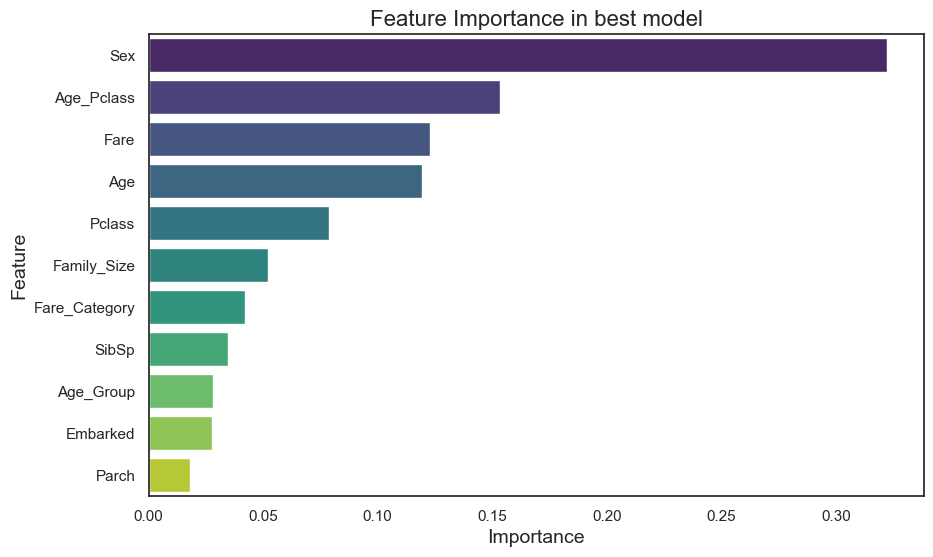

In [53]:
# Feature importances from the trained RandomForestClassifier (your final model)
feature_importances = final_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importance_df, palette='viridis', legend=False)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance in best model', fontsize=16)
plt.show()

### Predictions on Test set

In [54]:
test_predictions = final_model.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_predictions
})
submission.to_csv('titanic_predictions.csv', index=False)

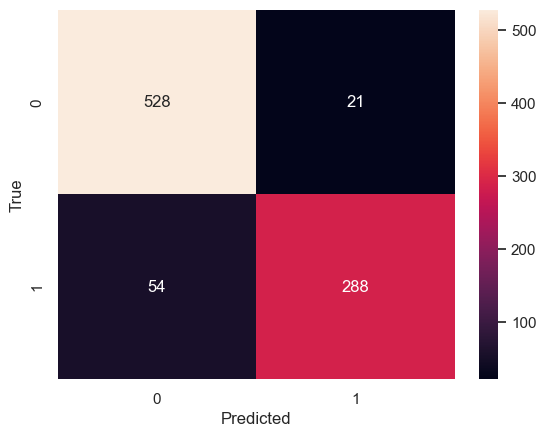

In [55]:
predictions = final_model.predict(X_train)
true_labels = Y_train

cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [56]:
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       549
           1       0.93      0.84      0.88       342

    accuracy                           0.92       891
   macro avg       0.92      0.90      0.91       891
weighted avg       0.92      0.92      0.91       891

